In [1]:
import area_mandelbrot as am
import sampling_alg as sa

import numpy as np
from numba import njit, prange
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import Counter
import pickle

In [2]:
# @njit(parallel=True)
def mc_area(bounds, samples, iter, N):
    # Compute area ## ~10min runtime
    A_pr, A_lh, A_ot = [], [], []
    for i in iter:
        i_pr, i_lh, i_ot = [], [], []
        for s in samples:
            s_pr, s_lh, s_ot = [], [], []
            for _ in range(N):
                s_pr += [[am.area(sa.sample_pr, bounds, s, i)]]
                s_lh += [[am.area(sa.sample_lh, bounds, s, i)]]
                s_ot += [[am.area(sa.sample_ot, bounds, s, i)]]
            i_pr += [[np.mean(s_pr), np.std(s_pr)]]
            i_lh += [[np.mean(s_lh), np.std(s_lh)]]
            i_ot += [[np.mean(s_ot), np.std(s_ot)]]
            # print(f"Sample {s} done", end='\r', flush=True)
        A_pr += [i_pr]
        A_lh += [i_lh]
        A_ot += [i_ot]
        print(f"Iteration {i} done")
    return np.array(A_pr), np.array(A_lh), np.array(A_ot)

def picklesave():
    file_pr = open('area_pr', 'wb')
    pickle.dump(A_pr, file_pr)
    file_pr.close()
    file_lh = open('area_lh', 'wb')
    pickle.dump(A_lh, file_lh)
    file_lh.close()
    file_ot = open('area_ot', 'wb')
    pickle.dump(A_ot, file_ot)
    file_ot.close()

def pickleopen():
    file_pr = open('area_pr', 'rb')
    A_pr = pickle.load(file_pr)
    file_pr.close()
    file_lh = open('area_lh', 'rb')
    A_lh = pickle.load( file_lh)
    file_lh.close()
    file_ot = open('area_ot', 'rb')
    A_ot = pickle.load(file_ot)
    file_ot.close()
    return A_pr, A_lh, A_ot

In [3]:
samples = [10 ** i for i in range(0,8,2)]   # sample size
iterations = [10 ** i for i in range(1,6)]  # iterations
bounds = -2, 0.47, -1.12, 1.12              # real-min,max,im-min,max

# A_pr, A_lh, A_ot = mc_area(bounds, samples, iterations, 5)
A_pr, A_lh, A_ot = pickleopen()

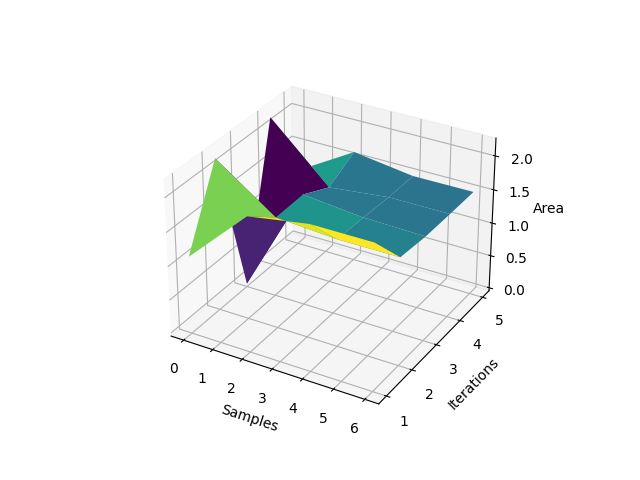

In [4]:
plt.close()
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(range(0,8,2), range(1,6))
ax.plot_surface(X, Y, A_pr[:,:,0], cmap='viridis')
ax.set_xlabel('Samples')
# ax.set_xscale('log')
ax.set_ylabel('Iterations')
# ax.set_yscale('log')
ax.set_zlabel('Area')
plt.show()

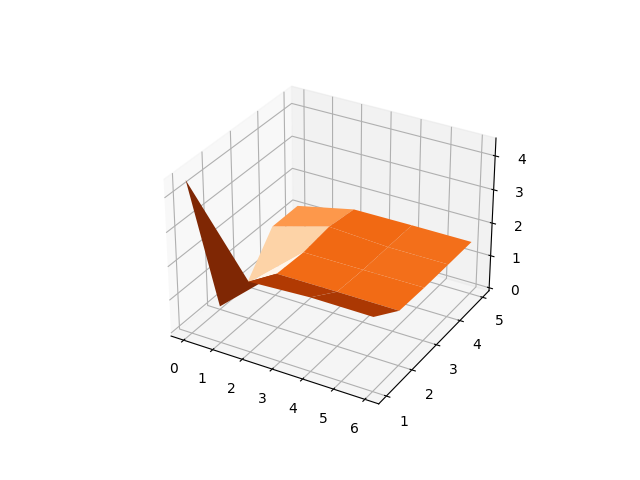

In [5]:
fig2 = plt.figure()
ax2 = plt.axes(projection='3d')
ax2.plot_surface(X, Y, A_lh[:,:,0], cmap='Oranges')
plt.show()

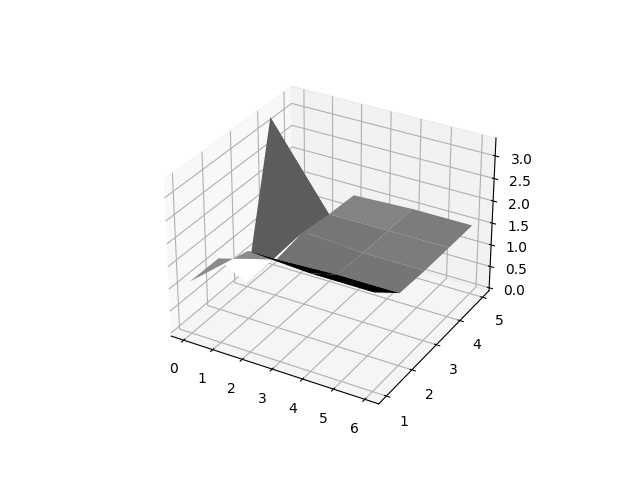

In [6]:
fig3 = plt.figure()
ax3 = plt.axes(projection='3d')
ax3.plot_surface(X, Y, A_ot[:,:,0], cmap='Greys')
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.errorbar(iterations, A_pr[:,0], A_pr[:,1], fmt='o-', capsize=5, elinewidth=1)
plt.errorbar(iterations, A_lh[:,0], A_lh[:,1], fmt='o-', capsize=5, elinewidth=1)
plt.errorbar(iterations, A_ot[:,0], A_ot[:,1], fmt='o-', capsize=5, elinewidth=1)

plt.legend(['PR', 'LH', 'OT'])
ax.set_xscale('log')
plt.ylabel('Area')
plt.xlabel('no. of iterations')
plt.show()